# Analysis - exp51

- DQN with a conv net. First tuning attempt.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [2]:
path = "/Users/qualia/Code/azad/data/wythoff/exp51/"
exp_51 = load_data(path, run_index=(0, 99))

In [3]:
print(len(exp_51))

100


In [4]:
pprint(exp_51[1].keys())
pprint(exp_51[1]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
[0.0851063829787234,
 0.07476635514018691,
 0.07692307692307693,
 0.06923076923076923,
 0.06896551724137931,
 0.06535947712418301,
 0.07317073170731707,
 0.06976744186046512,
 0.06593406593406594,
 0.06030150753768844,
 0.06944444444444445,
 0.07234042553191489,
 0.06938775510204082,
 0.06640625,
 0.06439393939393939,
 0.06593406593406594,
 0.06382978723404255,
 0.06688963210702341,
 0.0664451827242525,
 0.0673076923076923]


# Plots
## All parameter summary

How's it look overall.

### Timecourse

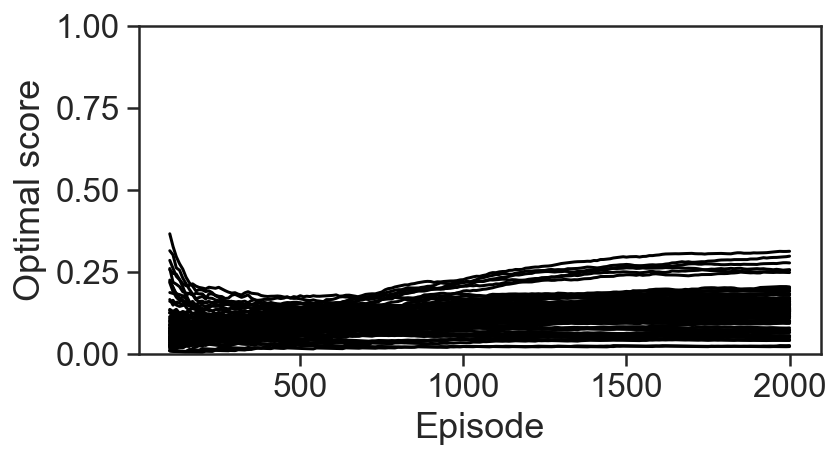

In [5]:
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_51):
    if mon is not None:
        _ = plt.plot(mon['episode'], mon['score'], color='black')
        _ = plt.ylim(0, 1)
_ = plt.ylabel("Optimal score")
_ = plt.tight_layout()   
_ = plt.xlabel("Episode")

### Histograms of final values

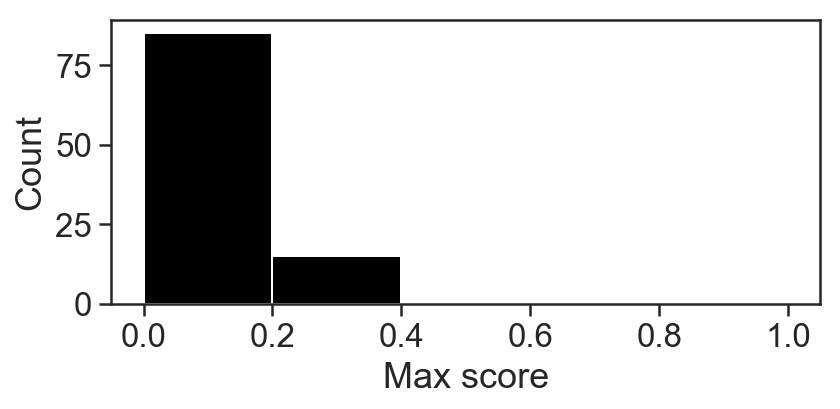

In [7]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_51):
    if mon is not None:
        data.append(np.max(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Max score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()      

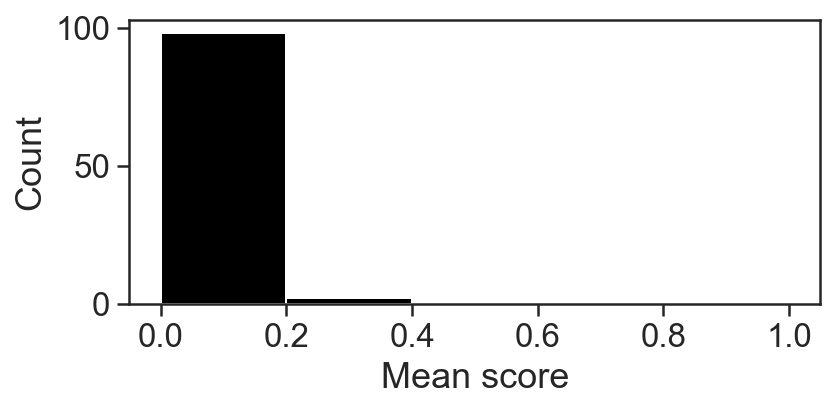

In [9]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_51):
    if mon is not None:
        data.append(np.mean(mon['score']))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Mean score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()                                    

# Conclusion

- Terrible. No reason to do any more analysis